In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Loading the data**

In [3]:
data = pd.read_csv("diabetes_data_upload.csv")
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


**Saving a copy of the data**

In [4]:
data_copy = data.copy()

**Data Processing**

checking for null values

In [5]:
data.isnull().sum().any()

False

Encoding categorical data to numeric data

In [6]:
data['class'].unique()

array(['Positive', 'Negative'], dtype=object)

In [7]:
yes_no_cols = data.columns.drop(['Age', 'Gender', 'class', 'Polyuria'])

In [8]:
gender_mapping = {'Male':0, 'Female':1}
yes_no_mappping = {'Yes':1, 'No':0}
class_mapping = {'Positive':1, 'Negative':0}

In [9]:
data['Gender'] = data['Gender'].map(gender_mapping)
data['class'] = data['class'].map(class_mapping)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
data['Polyuria'] = le.fit_transform(data['Polyuria'])

In [12]:
for col in yes_no_cols:
  data[col] = le.transform(data[col])

Feature selection

In [13]:
X, y = data.drop('class', axis=1), data['class']

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

In [17]:
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

In [32]:
selector.get_support()

array([ True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False])

In [21]:
X_new = data[['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'Polyphagia', 'visual blurring', 'Irritability', 'partial paresis',
       'Alopecia']]

y_new = data['class']

Checking for class imbalance

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

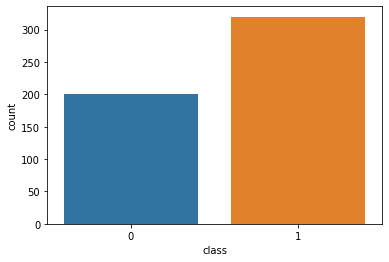

In [23]:
sns.countplot(y_new)

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote = SMOTE(random_state=56)

X, y = smote.fit_resample(X_new, y_new)

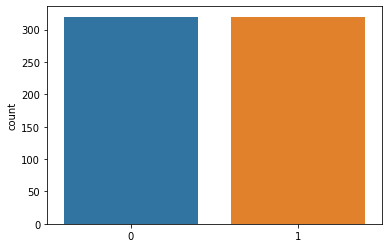

In [26]:
sns.countplot(y)

In [30]:
X = pd.DataFrame(X, columns=['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'Polyphagia', 'visual blurring', 'Irritability', 'partial paresis',
       'Alopecia'])

**EDA**

In [31]:
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,Polyphagia,visual blurring,Irritability,partial paresis,Alopecia
0,40,0,0,1,0,0,0,0,0,1
1,58,0,0,0,0,0,1,0,1,1
2,41,0,1,0,0,1,0,0,0,1
3,45,0,0,0,1,1,0,0,0,0
4,60,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
635,67,0,1,0,0,1,1,1,0,1
636,56,0,0,0,0,1,1,0,0,0
637,40,0,0,1,1,0,1,0,1,0
638,53,0,0,0,0,0,1,0,0,1


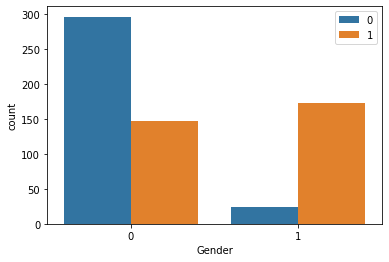

In [37]:
sns.countplot(X['Gender'], hue=y)

**Splitting the data into training, testing and validation sets**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

x_train_, x_val, y_train_, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=56)

**Model Selection**

In [41]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.metrics import f1_score, classification_report

In [50]:
def model_selection(x_train_, x_val, y_train_, y_val, model):
  model = model()
  model.fit(x_train_, y_train_)

  pred = model.predict(x_val)

  f1 = f1_score(y_val, pred)
  report = classification_report(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)

  print('F1 Score:', f1*100)
  print('\n')
  print('Classification report:', report)
  print('\n')
  print('Train Score:', train_score*100)
  print('\n')
  print('Val Score:', val_score*100)
  print('\n')
  print('Is overfitting:', True if train_score>val_score else False)
  print('\n')
  print('Overfitting by:',train_score*100-val_score*100)

In [51]:
extratrees = model_selection(x_train_, x_val, y_train_, y_val, ExtraTreesClassifier)
extratrees

F1 Score: 98.14814814814815


Classification report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.96      0.98        55

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



Train Score: 100.0


Val Score: 98.05825242718447


Is overfitting: True


Overfitting by: 1.9417475728155296


In [52]:
gradient = model_selection(x_train_, x_val, y_train_, y_val, GradientBoostingClassifier)
gradient

F1 Score: 93.33333333333333


Classification report:               precision    recall  f1-score   support

           0       0.89      0.98      0.93        48
           1       0.98      0.89      0.93        55

    accuracy                           0.93       103
   macro avg       0.93      0.94      0.93       103
weighted avg       0.94      0.93      0.93       103



Train Score: 99.26650366748166


Val Score: 93.20388349514563


Is overfitting: True


Overfitting by: 6.062620172336025


In [53]:
randomforest = model_selection(x_train_, x_val, y_train_, y_val, RandomForestClassifier)
randomforest

F1 Score: 98.14814814814815


Classification report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.96      0.98        55

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



Train Score: 100.0


Val Score: 98.05825242718447


Is overfitting: True


Overfitting by: 1.9417475728155296


In [54]:
ada = model_selection(x_train_, x_val, y_train_, y_val, AdaBoostClassifier)
ada

F1 Score: 90.38461538461537


Classification report:               precision    recall  f1-score   support

           0       0.85      0.96      0.90        48
           1       0.96      0.85      0.90        55

    accuracy                           0.90       103
   macro avg       0.91      0.91      0.90       103
weighted avg       0.91      0.90      0.90       103



Train Score: 94.37652811735941


Val Score: 90.29126213592234


Is overfitting: True


Overfitting by: 4.085265981437075


In [55]:
xgb = model_selection(x_train_, x_val, y_train_, y_val, XGBClassifier)
xgb

F1 Score: 93.20388349514563


Classification report:               precision    recall  f1-score   support

           0       0.87      1.00      0.93        48
           1       1.00      0.87      0.93        55

    accuracy                           0.93       103
   macro avg       0.94      0.94      0.93       103
weighted avg       0.94      0.93      0.93       103



Train Score: 98.0440097799511


Val Score: 93.20388349514563


Is overfitting: True


Overfitting by: 4.840126284805464


In [56]:
lgbm = model_selection(x_train_, x_val, y_train_, y_val, LGBMClassifier)
lgbm

F1 Score: 95.32710280373831


Classification report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.98      0.93      0.95        55

    accuracy                           0.95       103
   macro avg       0.95      0.95      0.95       103
weighted avg       0.95      0.95      0.95       103



Train Score: 100.0


Val Score: 95.14563106796116


Is overfitting: True


Overfitting by: 4.854368932038838


In [57]:
logistic = model_selection(x_train_, x_val, y_train_, y_val, LogisticRegression)
logistic

F1 Score: 90.38461538461537


Classification report:               precision    recall  f1-score   support

           0       0.85      0.96      0.90        48
           1       0.96      0.85      0.90        55

    accuracy                           0.90       103
   macro avg       0.91      0.91      0.90       103
weighted avg       0.91      0.90      0.90       103



Train Score: 92.90953545232273


Val Score: 90.29126213592234


Is overfitting: True


Overfitting by: 2.6182733164003906


I will use ExtraTreesClassifier here cuz it has a goof f1 score and the overfitting rate is the lowest

**Model Building and Training**

In [58]:
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

**Predictions**

In [59]:
pred = model.predict(x_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

**Precision, Recall, Accuracy and AUC check**

In [62]:
from sklearn.metrics import roc_auc_score

In [60]:
f1 = f1_score(y_test, pred)
f1*100

97.2972972972973

In [61]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.97      0.98        73\n           1       0.96      0.98      0.97        55\n\n    accuracy                           0.98       128\n   macro avg       0.98      0.98      0.98       128\nweighted avg       0.98      0.98      0.98       128\n'

In [63]:
AUC = roc_auc_score(y_test, pred)
AUC*100

97.72104607721046

**Checking for overfitting**

In [64]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print('Overfitting by:', train_score*100-test_score*100)

Overfitting by: 2.34375
